In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("/home/so87pot/n0w0f/structllm/data/396k/slice_canonical.csv",index_col=False)

In [10]:
df = df.dropna()
df = df['slices']

In [11]:
df

1         Cl Sr Ba Ba 0 2 o - o 0 3 o o o 1 1 - o o 1 1 ...
4         Na Cu Sn Sn 0 1 o o o 0 2 - - o 0 3 - o o 1 2 ...
5                           Fe Fe Fe W 0 1 o o o 2 3 - o o 
7         La La Ta Ta Ta Ta 0 2 o o o 1 2 o o o 1 4 o o ...
8         Ti Hf Hf Pb 0 1 - - - 0 1 - - o 0 1 - o - 0 1 ...
                                ...                        
534883                        Al Cr Pt 0 1 - o o 1 2 o o o 
534884                     Fe Mo Pb Pb 0 1 - o o 2 3 o o o 
534887    Be Pd Te Te 0 0 o + o 0 0 + o o 0 1 o o - 0 2 ...
534888    Zn Se Au Au 0 1 - o o 0 1 o - o 0 1 o o - 0 2 ...
534890    Al Pd Pd Pt 0 1 - o o 0 3 o o o 1 2 o o o 1 3 ...
Name: slices, Length: 366676, dtype: object

In [15]:
df.to_csv("/home/so87pot/n0w0f/structllm/data/396k/slice_canonical_clean.csv",index=False)

In [1]:
import lmdb
import pickle
import json
import fire
import numpy as np

from tqdm import tqdm 
from math import pi
from pymatgen.core import Structure, Lattice

In [2]:
class Dataset():
  """
  Custom class for reading NOMAD dataset from MatSciML Zenodo
  
  """

  def __init__(self, lmdb_path, max_readers=1, transform=None, pre_transform=None):
    """
    Constructor for dataset
    param: lmdb_path -> path to lmdb_file
    param: max_readers -> maximum number of concurrent read processes accessing lmdb file
    """
    self.env = lmdb.open(lmdb_path,
        subdir=False,
        readonly=True,
        lock=False,
        readahead=False,
        meminit=False,
        max_readers=max_readers)
    self.txn = self.env.begin()
    
  def len(self):
    
    return self.txn.stat()['entries']
    

  def get(self, index):
    """
    Return a  datapoint
    """
    # Select graph sample
    id = f"{index}".encode("ascii")
    datapoint = pickle.loads(self.txn.get(id))
    
    return datapoint

In [29]:
data = Dataset(lmdb_path="/home/so87pot/n0w0f/matsciml/matsciml/datasets/nomad/data_2/lmdb_2/data.lmdb")

In [30]:
data.len()

797222

In [31]:
mat = data.get(4)

In [32]:
for i in range(1000):
    mat = data.get(i) 
    try:
        print(mat['material']['material_id'])
    except:
        print("None")

pQzGKAvsyigRUCwY8UD6HEE8yhs3
None
tGWX8hZF9Ums3s7kdhkxTLDB4M9V
fOqC9jYOaIZ7AVbDlgkXu36OxBiG
tLdTY9zwdKdKp5QBXPf-A_-V4gSr
None
None
None
None
ag8JD9vchKi_Lox2hpIyusRU1iJH
tbrkP53Pge8bkwJItEYa7nLQkBby
VNv95FeZ7a5fGK-W1ETdnS84kbep
None
djgArVaQSsFp9cUqulu6OXa94l_6
p5ePVygkpE6ThB37R9gHFyk8sNNR
fp-r2JldEXhXvexZCtuu0-L5FXh-
rMd2rcW3_vWctlfc4_ScnFgtaKWq
None
RvOU3CqB9Jby_Jqxb4tDrFpOEHHb
None
None
6ILGMK1AG9JBdPxBiMCdp03oPu6y
lXIT3QO0S4OmHTdqFbYI567YsXB-
BmeuX7aASotMeaMBmyw1bfUALHll
RyMowpTHZDGcNSydDxmMxJtnBWgg
CzaK00GPvI_hLv_x-SEXVE8ted-U
None
TCujM5vHVDNlc4A5bx0wxStf-s2V
oS5T2iZT4c-jr6DKym4ohMlYNd_R
ki1Vi5DZO5YI3Tkep44zsmHkr4Fk
mqrmgaj2oiA7AbTAzvIXKmK3AM_H
CXlHieYBnzqDbJyu4EUwyMEl248M
None
y35jgS1J4_bEPrn_ZBwYrjf-TCyk
dUqZWYpnLKZ_KATy3foL6IPygGw6
None
lilfld-VG7KoHmo0ZYMnkEJpRm0d
zyy_qKPnTeEtSnlCCdjXIZzAOoiM
None
g6jyfRHBew3p7NaLcEOwcqkmvevU
None
lupM3hUDmcesBt6_4dYvAJuFv4Pm
None
vbWFdvy6eGukWkrt1QNDhfqkfT9F
JmDmeUNRLgD3HgR3HNrMYTU0lXCj
_5jxAxYlJye0mM_P6g_RJUY6QbqM
aL9TR2IDnh2uSE0PuZLOH-O1dB

In [12]:
mat['material']

{'material_id': '8BT6T4tWzcfQw1eC4J5bT5b-UKTK',
 'structural_type': 'bulk',
 'elements': ['Mo', 'Se', 'Ta'],
 'chemical_formula_descriptive': 'Mo2SeTa',
 'chemical_formula_reduced': 'Mo2SeTa',
 'chemical_formula_hill': 'Mo2SeTa',
 'chemical_formula_anonymous': 'A2BC',
 'chemical_formula_reduced_fragments': ['Mo2', 'Se', 'Ta'],
 'symmetry': {'bravais_lattice': 'oI',
  'crystal_system': 'orthorhombic',
  'hall_number': 337,
  'hall_symbol': '-I 2 2',
  'point_group': 'mmm',
  'space_group_number': 71,
  'space_group_symbol': 'Immm'}}

In [9]:
mat.keys()

dict_keys(['material', 'method', 'properties', 'energies'])

In [ ]:
if mat['properties']['structures']['structure_primitive']:
    crystal = mat['properties']['structures']['structure_primitive']
else:
    crystal = mat["properties"]["structures"]["structure_original"]

In [23]:
mat['properties']['structures'].keys()

dict_keys(['structure_original', 'structure_conventional', 'structure_primitive'])

In [24]:
mat['properties']['structures']['structure_primitive'].keys()

dict_keys(['dimension_types', 'lattice_vectors', 'cartesian_site_positions', 'species_at_sites', 'cell_volume', 'atomic_density', 'mass_density', 'species', 'lattice_parameters'])

In [20]:
mat['properties']['structures'].keys()

dict_keys(['structure_original', 'structure_conventional', 'structure_primitive'])

In [12]:
mat['material']

{'material_id': 'Yk58wOByhuETPdpXFsJVWijUDP9M',
 'structural_type': 'bulk',
 'elements': ['Se', 'Sn', 'Zn'],
 'chemical_formula_descriptive': 'Se2SnZn2',
 'chemical_formula_reduced': 'Se2SnZn2',
 'chemical_formula_hill': 'Se2SnZn2',
 'chemical_formula_anonymous': 'A2B2C',
 'chemical_formula_reduced_fragments': ['Se2', 'Sn', 'Zn2'],
 'symmetry': {'bravais_lattice': 'tI',
  'crystal_system': 'tetragonal',
  'hall_number': 424,
  'hall_symbol': '-I 4 2',
  'point_group': '4/mmm',
  'space_group_number': 139,
  'space_group_symbol': 'I4/mmm'}}

In [17]:
mat['properties'].keys()

dict_keys(['n_calculations', 'available_properties', 'structures', 'geometry_optimization'])

In [15]:
mat['properties']['available_properties']

['element',
 'energies',
 'final_energy_difference',
 'final_force_maximum',
 'geometry_optimization',
 'geometry_optimization.energies',
 'geometry_optimization.final_energy_difference',
 'geometry_optimization.final_force_maximum',
 'geometry_optimization.structure_optimized',
 'geometry_optimization.structure_optimized.atomic_density',
 'geometry_optimization.structure_optimized.cartesian_site_positions',
 'geometry_optimization.structure_optimized.cell_volume',
 'geometry_optimization.structure_optimized.dimension_types',
 'geometry_optimization.structure_optimized.lattice_parameters',
 'geometry_optimization.structure_optimized.lattice_parameters.a',
 'geometry_optimization.structure_optimized.lattice_parameters.alpha',
 'geometry_optimization.structure_optimized.lattice_parameters.b',
 'geometry_optimization.structure_optimized.lattice_parameters.beta',
 'geometry_optimization.structure_optimized.lattice_parameters.c',
 'geometry_optimization.structure_optimized.lattice_parameter

In [2]:
import os
import pandas as pd
def combine_csv_files( input_directory: str, output_filename: str) -> None:
        """
        Combine CSV files from the input directory into a single CSV file.

        Args:
            input_directory (str): The directory containing CSV files to combine.
            output_filename (str): The name of the output combined CSV file.

        Returns:
            None
        """
        # Check if the input directory exists
        if not os.path.exists(input_directory):
            print(f"Input directory '{input_directory}' does not exist.")
            return

        # Initialize an empty DataFrame to store the combined data
        combined_data = pd.DataFrame()

        # Loop through CSV files in the input directory and concatenate them
        for root, dirs, files in os.walk(input_directory):
            for file in files:
                if file.endswith(".csv"):
                    file_path = os.path.join(root, file)
                    # Specify column names when reading the CSV file
                    df = pd.read_csv(file_path)
                    combined_data = pd.concat([combined_data, df], ignore_index=True)

        # Save the combined data to the output CSV file
        combined_data.to_csv(output_filename, index=False)
        print(f"Combined CSV files saved to '{output_filename}'.")

In [3]:
combine_csv_files("/home/so87pot/n0w0f/structllm/data/all", "/home/so87pot/n0w0f/structllm/data/all/nomad.csv")

Combined CSV files saved to '/home/so87pot/n0w0f/structllm/data/all/nomad.csv'.


Total Entries: 531574


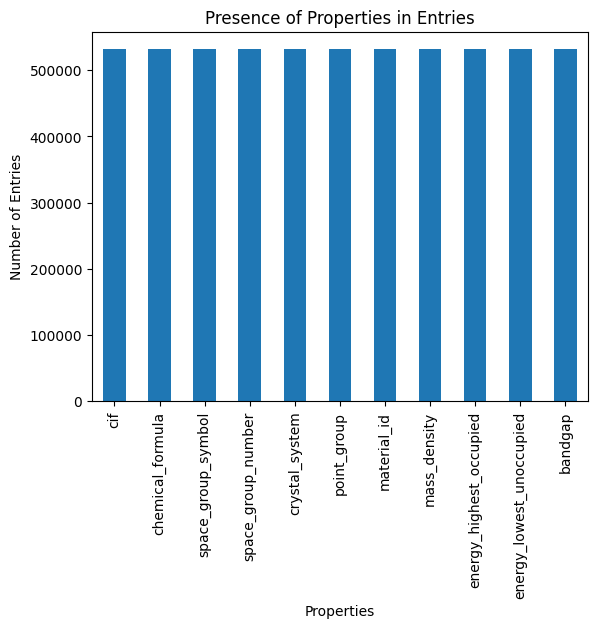

Presence of Each Property in %:
cif                         100.0
chemical_formula            100.0
space_group_symbol          100.0
space_group_number          100.0
crystal_system              100.0
point_group                 100.0
material_id                 100.0
mass_density                100.0
energy_highest_occupied     100.0
energy_lowest_unoccupied    100.0
bandgap                     100.0
dtype: float64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV into a DataFrame
df = pd.read_csv('/home/so87pot/n0w0f/structllm/data/all/nomad_electronic.csv')

# Count total entries
total_entries = len(df)

# Check presence of each property and count the occurrences
properties_present = df.count()
print(f"Total Entries: {total_entries}")

# Plot the presence of properties
properties_present.plot(kind='bar')
plt.title('Presence of Properties in Entries')
plt.xlabel('Properties')
plt.ylabel('Number of Entries')
plt.show()

# Calculate the percentage of entries having each property
percent_presence = (properties_present / total_entries) * 100


print(f"Presence of Each Property in %:\n{percent_presence}")




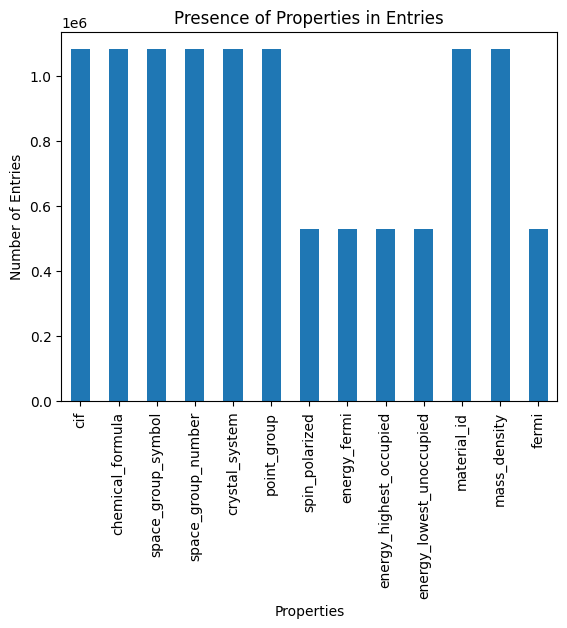

Presence of Each Property in %:
cif                         100.000000
chemical_formula            100.000000
space_group_symbol          100.000000
space_group_number          100.000000
crystal_system              100.000000
point_group                 100.000000
spin_polarized               49.092850
energy_fermi                 49.092850
energy_highest_occupied      49.086756
energy_lowest_unoccupied     49.092850
material_id                 100.000000
mass_density                 99.985227
fermi                        49.092850
dtype: float64


In [27]:
df = pd.read_csv('/home/so87pot/n0w0f/structllm/data/all/nomad.csv')
# Select columns of interest
columns_of_interest = [
    "cif",
    "chemical_formula",
    "space_group_symbol",
    "space_group_number",
    "crystal_system",
    "point_group",
    "material_id",
    "mass_density",
    "energy_highest_occupied",
    "energy_lowest_unoccupied",
]

# Keep only the specified columns
df = df[columns_of_interest]
df['bandgap'] = df['energy_highest_occupied'] - df['energy_lowest_unoccupied']

# Remove rows with 'None' values in any column
df = df.dropna()

# Save the resulting DataFrame to a new CSV file
df.to_csv('/home/so87pot/n0w0f/structllm/data/all/nomad_electronic.csv', index=False)

In [3]:
import pandas as pd

In [12]:
path = "/home/so87pot/n0w0f/structllm/data/all/slice/combined_500.csv"
df = pd.read_csv(path)

In [13]:
df.columns

Index(['slices', 'formula', 'crystal'], dtype='object')

In [14]:
len(df)

921141

In [15]:
df = df.drop_duplicates()

In [8]:
len(df)

396499

In [16]:
df = df.dropna()

In [17]:
df.to_csv('/home/so87pot/n0w0f/structllm/data/all/slice/combined_clean_396.csv', index=False)